In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from tensorflow.examples.tutorials.mnist import input_data

In [0]:
mnist=input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.train.images[12].shape

(784,)

In [0]:
sample=mnist.train.images[224].reshape(28,28)

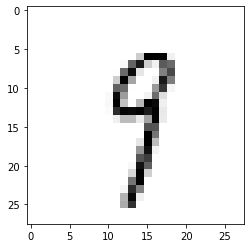

In [0]:
plt.imshow(sample,cmap='Greys')

In [0]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [0]:
 n_classes=10
 n_samples=mnist.train.num_examples

In [0]:
n_input=784

In [0]:
n_hidden_1=256
n_hidden_2=256

In [0]:
def multilayer_perceptron(x,weights,bias):
  #x->Placeholder
  #weights->dict of weights
  #bias-> dict of bias

  #Layer 1
    layer_1=tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    #RELU Activator
    layer_1=tf.nn.relu(layer_1)

  #Layer 2
    layer_2=tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2=tf.nn.relu(layer_2)

  #Output Layer
    out_layer=tf.matmul(layer_2,weights['out'])+biases['out']

    return out_layer



In [0]:
weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [0]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [0]:
x=tf.placeholder('float',[None,n_input])

In [0]:
y=tf.placeholder('float',[None,n_classes])

In [0]:
pred=multilayer_perceptron(x,weights,biases)

In [0]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(pred,y))

In [0]:
optimizer=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
##Training the Model

In [0]:
t=mnist.train.next_batch(1)

In [0]:
batchX,batchY=t

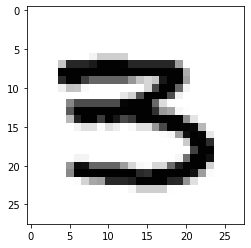

In [0]:
plt.imshow(batchX.reshape(28,28),cmap='Greys')

In [0]:
sess=tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [0]:
init=tf.initialize_all_variables()

In [0]:
sess.run(init)

In [0]:
#15 Loops
for epochs in range(training_epochs):
   avg_cost=0.0
   total_batch= int(n_samples/batch_size)
   for i in range(total_batch):
     batch_x,batch_y=mnist.train.next_batch(batch_size)
     _,c=sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
     avg_cost += c/total_batch
   print("Epoch: {} cost:{:.4f}".format(epochs+1,avg_cost))

print("Model has completed {} Epochs of training".format(training_epochs))

Epoch: 1 cost:-25759213.5049
Epoch: 2 cost:-424654244.5964
Epoch: 3 cost:-1734354114.4436
Epoch: 4 cost:-4275006990.8945
Epoch: 5 cost:-8237396921.2509
Epoch: 6 cost:-13752087376.9891
Epoch: 7 cost:-20922713549.7309
Epoch: 8 cost:-29849623201.9782
Epoch: 9 cost:-40624563725.0327
Epoch: 10 cost:-53344668273.5709
Epoch: 11 cost:-68106995131.1127
Epoch: 12 cost:-85006551807.0691
Epoch: 13 cost:-104146012212.1310
Epoch: 14 cost:-125634810049.6292
Epoch: 15 cost:-149572864722.3854
Model has completed 15 Epochs of training


In [0]:
#Model Evaluation

In [0]:
correct_prediction=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [0]:
print(correct_prediction)

Tensor("Equal_3:0", shape=(?,), dtype=bool)


In [0]:
correct_prediction=tf.cast(correct_prediction,'float')

In [0]:
print(correct_prediction)

Tensor("Cast_3:0", shape=(?,), dtype=float32)


In [0]:
accuracy=tf.reduce_mean(correct_prediction)

In [0]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [0]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [0]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.1009